In [2]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

sns.set()

## Import preprocessed data

In [3]:
df = pd.read_csv(join('..', 'data', 'tugas_preprocessed.csv'))

In [4]:
df.columns

Index(['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances',
       'toys', 'house_keeping', 'per_net_purchase', 'spent_online',
       'x0_2nd Cycle', 'x0_Graduation', 'x0_Master', 'x0_PhD', 'x1_Married',
       'x1_Single', 'x1_Together', 'x1_Whatever', 'x1_Widow', 'x2_M', 'x3_1.0',
       'x4_Kind of OK', 'x4_Meh...', 'x4_OK nice!', 'x4_Take my money!!',
       'PC0', 'PC1', 'PC2'],
      dtype='object')

In [5]:
df.head(2)

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income              8817 non-null   float64
 1   frq                 8817 non-null   float64
 2   rcn                 8817 non-null   float64
 3   clothes             8817 non-null   float64
 4   kitchen             8817 non-null   float64
 5   small_appliances    8817 non-null   float64
 6   toys                8817 non-null   float64
 7   house_keeping       8817 non-null   float64
 8   per_net_purchase    8817 non-null   float64
 9   spent_online        8817 non-null   float64
 10  x0_2nd Cycle        8817 non-null   float64
 11  x0_Graduation       8817 non-null   float64
 12  x0_Master           8817 non-null   float64
 13  x0_PhD              8817 non-null   float64
 14  x1_Married          8817 non-null   float64
 15  x1_Single           8817 non-null   float64
 16  x1_Tog

In [13]:
#use the caracteristics of the header name to filter the features

non_metric_features = df.columns[df.columns.str.startswith('x')] 
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

In [15]:
metric_features = df.columns.drop(non_metric_features and pc_features).to_list()

## Hierarchical Clustering

What is hierarchical clustering? How does it work?

### Different types of linkage
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png)

### How are they computed?
![](../figures/linkage_types.jpeg)

**Which types of variables should be used for clustering?**

In [18]:
# setting distance_threshold=0 ensures we compute the full tree.
#hclust = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hclust = AgglomerativeClustering(linkage="ward", affinity='euclidean',n_clusters=5)
hclust

AgglomerativeClustering(n_clusters=5)

In [21]:
# fit the clusterer (fit predict return the label of fit, that's the difference)
hc_label = hclust.fit_predict(df[metric_features])
hc_label
#hierarchical clustering are only used with continuous variables

array([0, 0, 1, ..., 1, 2, 2], dtype=int64)

In [24]:
from collections import Counter
Counter(hc_label)

Counter({0: 1848, 1: 2510, 2: 2216, 4: 1360, 3: 883})

In [27]:
df_concat = pd.concat(
    [df, pd.Series(hc_label, name='labels')],
    axis=1
)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
labels,,,,,,,,,,,,,,,,,,,,,
0,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598,...,0.117424,0.638528,0.175866,0.082251,0.088203,0.456710,0.370130,0.746026,2.063737,-0.345349
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319,...,0.008765,0.633865,0.927490,0.329482,0.328287,0.335060,0.000000,-1.186206,-0.872564,-0.645961
2,0.583921,0.696600,0.028464,0.512591,-0.310472,-0.414163,-0.309056,-0.288473,-0.184634,1.123735,...,0.064531,0.652076,0.754061,0.145758,0.148466,0.424188,0.281137,1.536198,0.181397,0.429003
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724,...,0.018120,0.664779,0.793884,0.335221,0.335221,0.319366,0.001133,-3.430678,0.583211,0.999316
4,-0.141469,-0.441731,-0.195457,1.235357,-0.700710,-1.054846,-0.723419,-0.668869,0.418864,-0.230577,...,0.027206,0.640441,0.953676,0.334559,0.315441,0.336765,0.007353,0.899848,-1.868089,0.313602


In [24]:
hclust.children_.shape[0]

8816

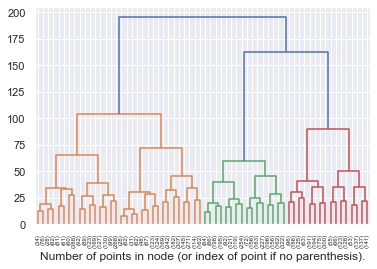

In [30]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form 
# node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [39]:
teste = df[metric_features]

In [40]:
teste

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Single,x1_Together,x1_Whatever,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,0.618993,0.458853,-1.701851,0.209670,0.167308,-0.132905,0.205767,-0.764540,0.257492,1.275517,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
8813,0.874744,0.733635,-1.701851,0.731791,-0.243065,-0.609288,-0.519409,-0.366640,0.690363,1.865248,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8814,-0.455617,-0.731869,-1.535723,0.079139,-0.106274,-0.053508,0.060732,-0.101374,1.556107,-0.801266,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8815,-0.596155,0.825229,0.657173,-0.442982,0.577680,0.581670,-0.809480,0.561792,-0.608252,0.801051,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


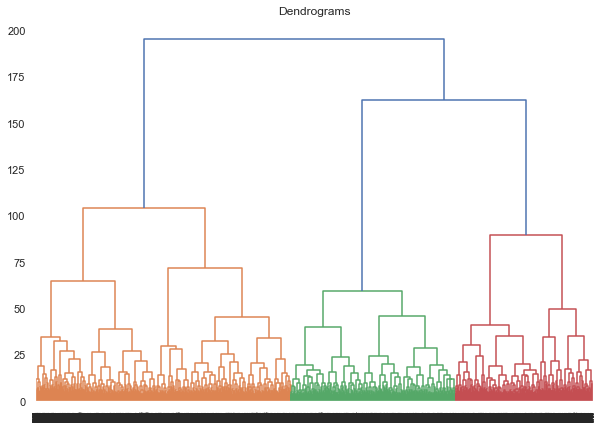

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(teste, method='ward'))
#plt.axhline(y=6, color='r', linestyle='--')

In [38]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')
cluster.fit_predict(teste)

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

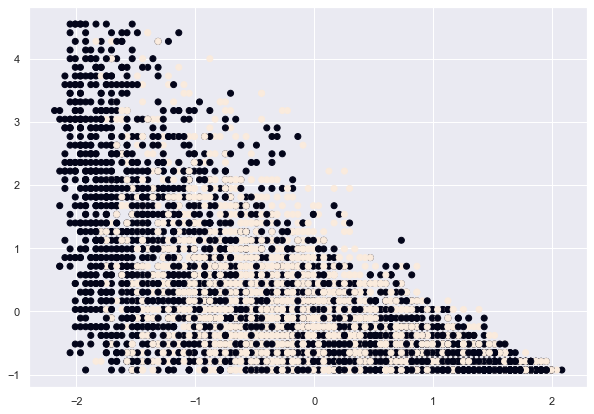

In [41]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clothes'], df['kitchen'], c=cluster.labels_) 